In [1]:
import keras
import tensorflow as tf
import os
import cv2
import numpy as np
import glob
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.color import gray2rgb, rgb2gray
from skimage.transform import resize

Using TensorFlow backend.


In [2]:
%matplotlib inline

In [3]:
from tensorflow.python.client import device_lib

def get_available_gpus():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos if x.device_type == 'GPU']

In [4]:
get_available_gpus()

['/device:GPU:0']

In [ ]:

for dir in glob.glob('C:/Users/rashi/Desktop/Elevator/data/*'):
    image_files = glob.glob(dir + '/*.jpg')
    label = dir.split('\\')[-1]
    print(label, len(image_files))
    for image_file in image_files:
        image = cv2.imread(image_file,cv2.IMREAD_UNCHANGED)
        image = cv2.resize(image, dsize=(32,32),interpolation = cv2.INTER_AREA)
        if len(image.shape) == 2: # if a gray-scale image
            #image = rgb2gray(image)
            image = gray2rbg(image)
        images.append(image)
        X.append(image)
        y.append(label)

In [ ]:
num ='124'
label = list()
for i in num:
    label.append(i)
label

In [28]:
images = []
X, y = [], []
y2 = []

for dir in glob.glob('C:/Users/rashi/Desktop/Elevator/data/*'):
    image_files = glob.glob(dir + '/*.jpg')
    label = dir.split('\\')[-1]
    print(label, len(image_files))
    for image_file in image_files:
        image = cv2.imread(image_file,cv2.IMREAD_UNCHANGED)
        image = cv2.resize(image, dsize=(64,64),interpolation = cv2.INTER_AREA)
        if len(image.shape) == 2: # if a gray-scale image
            #image = rgb2gray(image)
            image = gray2rbg(image)
        images.append(image)
        X.append(image)
        y.append(label)
        
        label2 = [int(i) for i in label]
        
        if len(label2)!=2:
            itr = 2-len(label2)
            for _ in range(itr):
                label2.append(10)
    
        y2.append(np.array(label2))
    label2=0

#load again
for dir in glob.glob('C:/Users/rashi/Desktop/Elevator/zipdata4/*'):
    image_files = glob.glob(dir + '/*.jpg')
    label = dir.split('\\')[-1]
    print(label, len(image_files))
    for image_file in image_files:
        image = cv2.imread(image_file,cv2.IMREAD_UNCHANGED)
        image = cv2.resize(image, dsize=(64,64),interpolation = cv2.INTER_AREA)
        if len(image.shape) == 2: # if a gray-scale image
            #image = rgb2gray(image)
            image = gray2rbg(image)
            #image = np.expand_dims(image, axis=2)
            
        images.append(image)
        X.append(image)
        y.append(label)
        
        label2 = [int(i) for i in label]
        
        if len(label2)!=2:
            itr = 2-len(label2)
            for _ in range(itr):
                label2.append(10)
    
        y2.append(np.array(label2))
    label2=0
#convert to numpy array
test_x = np.ones((len(X),64,64,3))
for i in range(len(X)):
    test_x[i] = X[i]
y = np.array(y2)
X = np.array(X)
print(len(images),test_x.shape, y.shape)

#save on disk in numpy format    
np.save('mltdigit_x.npy',X)
np.save('mltdigit_y.npy',y)

1 8
10 0
2 30
21 0
3 35
4 33
5 31
6 14
7 0
8 0
9 0
01 521
02 519
03 532
1 61
10 509
11 518
12 526
13 506
14 540
15 531
16 530
17 519
18 523
19 522
2 55
20 122
3 62
4 57
5 56
6 53
7 57
8 57
9 56
7583 (7583, 64, 64, 3) (7583, 2)


In [37]:
y[300]

array([0, 1])

In [38]:
data_x = np.load('mltdigit_x.npy')
data_y = np.load('mltdigit_y.npy')

In [39]:
from sklearn.utils import shuffle
data_x, data_y = shuffle(data_x, data_y, random_state= 1234)

In [40]:
data_x.shape, data_y.shape

((7583, 64, 64, 3), (7583, 2))

In [41]:
np.squeeze(images[200]).shape

(64, 64, 3)

In [43]:
data_y[300]

array([0, 3])

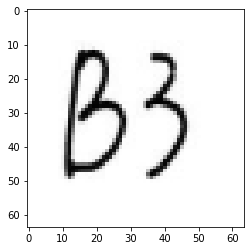

In [44]:
plt.imshow(data_x[300])

In [44]:
def random_sample(N, K):
    """Return a boolean mask of size N with K selections
    """
    mask = np.array([True]*K + [False]*(N-K))
    np.random.shuffle(mask)
    return mask

# Pick 4000 training and 2000 extra samples
sample1 = random_sample(data_x.shape[0], 1000)

X_test = data_x[sample1]
y_test = data_y[sample1]

X_train = data_x[~sample1]
y_train = data_y[~sample1]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4228, 64, 64, 3), (4228, 2), (1000, 64, 64, 3), (1000, 2))

In [ ]:
y2[200]

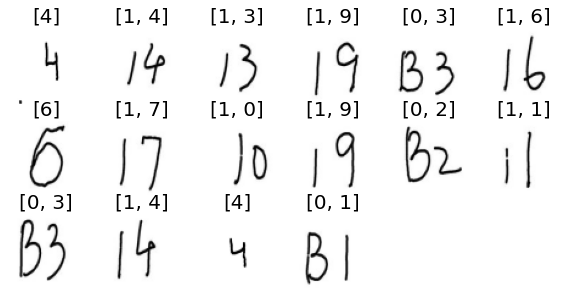

In [45]:
n = 6
indices = np.random.choice(len(test_x), 4*4)
plt.figure(figsize=(10,10))
plt.gray()
i = 1
for index in indices:
    title = [x for x in y[index] if x!=10]
    plt.subplot(n,n,i), plt.imshow(np.squeeze(images[index])), plt.axis('off'), plt.title(title, size=20)
    i += 1
plt.show()

In [ ]:
images = []
X, y = [], []
resize =(32,32)
for dir in glob.glob('C:/Users/rashi/Desktop/Elevator/data/*'):
    image_files = glob.glob(dir + '/*.jpg')
    label = dir.split('\\')[-1]
    print(label, len(image_files))
    for image_file in image_files:
        image = cv2.imread(image_file,cv2.IMREAD_UNCHANGED)
        image = cv2.resize(image, dsize=resize, interpolation = cv2.INTER_AREA)
        if len(image.shape) == 2: # if a gray-scale image
            #image = rgb2gray(image)
            image = gray2rbg(image)
        if int(label)<10:
            images.append(image)
            X.append(image)
            y.append(label)

#load again
for dir in glob.glob('C:/Users/rashi/Desktop/Elevator/zipdata/*'):
    image_files = glob.glob(dir + '/*.jpg')
    label = dir.split('\\')[-1]
    print(label, len(image_files))
    for image_file in image_files:
        image = cv2.imread(image_file,cv2.IMREAD_UNCHANGED)
        image = cv2.resize(image, dsize=resize, interpolation = cv2.INTER_AREA)
        if len(image.shape) == 2: # if a gray-scale image
            #image = rgb2gray(image)
            image = gray2rbg(image)
        if int(label)<10:
            images.append(image)
            X.append(image)
            y.append(label)

#convert to numpy array
test_x = np.ones((len(X),32,32,3))
for i in range(len(X)):
    test_x[i] = X[i]
y = np.array(y)

print(len(images),test_x.shape, y.shape)

#save on disk in numpy format    
np.save('test32_x.npy',X)
np.save('test32_y.npy',y)

In [ ]:
np.load('test32_x.npy')

In [ ]:
np.load('C:/Users/rashi/Desktop/Elevator/multi_digit_y.npy')

### data augmentation

In [ ]:
images = []
X, y = [], []
y2 = []


for dir in glob.glob('C:/Users/rashi/Desktop/Elevator/data/*'):
    image_files = glob.glob(dir + '/*.jpg')
    label = dir.split('\\')[-1]
    print(label, len(image_files))
    for image_file in image_files:
        image = cv2.imread(image_file,cv2.IMREAD_UNCHANGED)
        image = cv2.resize(image, dsize=(64,64),interpolation = cv2.INTER_AREA)
        if len(image.shape) == 2: # if a gray-scale image
            #image = rgb2gray(image)
            image = gray2rbg(image)
        images.append(image)
        X.append(image)
        y.append(label)
        
        label2 = [int(i) for i in label]
        
        if len(label2)!=2:
            itr = 2-len(label2)
            for _ in range(itr):
                label2.append(10)
    
        y2.append(np.array(label2))
    label2=0

for dir in glob.glob('C:/Users/rashi/Desktop/Elevator/zipdata/*'):
    image_files = glob.glob(dir + '/*.jpg')
    label = dir.split('\\')[-1]
    print(label, len(image_files))
    for image_file in image_files:
        image = cv2.imread(image_file,cv2.IMREAD_UNCHANGED)
        image = cv2.resize(image, dsize=(64,64),interpolation = cv2.INTER_AREA)
        if len(image.shape) == 2: # if a gray-scale image
            #image = rgb2gray(image)
            image = gray2rbg(image)
        images.append(image)
        X.append(image)
        y.append(label)
        
        label2 = [int(i) for i in label]
        
        if len(label2)!=2:
            itr = 2-len(label2)
            for _ in range(itr):
                label2.append(10)
    
        y2.append(np.array(label2))
    label2=0
    
#load again
for dir in glob.glob('C:/Users/rashi/Desktop/Elevator/zipdata1/*'):
    image_files = glob.glob(dir + '/*.jpg')
    label = dir.split('\\')[-1]
    print(label, len(image_files))
    for image_file in image_files:
        image = cv2.imread(image_file,cv2.IMREAD_UNCHANGED)
        image = cv2.resize(image, dsize=(64,64),interpolation = cv2.INTER_AREA)
        if len(image.shape) == 2: # if a gray-scale image
            #image = rgb2gray(image)
            image = gray2rbg(image)
            image = np.expand_dims(image, axis=2)
            
        images.append(image)
        X.append(image)
        y.append(label)
        
        label2 = [int(i) for i in label]
        
        if len(label2)!=2:
            itr = 2-len(label2)
            for _ in range(itr):
                label2.append(10)
    
        y2.append(np.array(label2))
    label2=0
#convert to numpy array
test_x = np.ones((len(X),64,64,3))
for i in range(len(X)):
    test_x[i] = X[i]
y = np.array(y2)

print(len(images),test_x.shape, y.shape)



In [ ]:
n = 6
indices = np.random.choice(len(test_x), 4*4)
plt.figure(figsize=(10,10))
plt.gray()
i = 1
for index in indices:
    title = [x for x in y[index] if x!=10]
    plt.subplot(n,n,i), plt.imshow(np.squeeze(images[index])), plt.axis('off'), plt.title(title, size=20)
    i += 1
plt.show()

In [ ]:
#save on disk in numpy format    
np.save('multi_digit__x.npy',X)
np.save('multi_digit_y.npy',y)

### Data Augmentation techniques 

1. Flipping the image
2. 

In [ ]:
idx=600
from sklearn.utils import shuffle
x_new, y_new = shuffle(X,y, replace=True, random_state=1234)
plt.imshow(x_new[idx])

In [ ]:

flipped = tf.image.adjust_brightness(x_new[idx],0.7)
grayscaled = tf.image.rot90(x_new[idx])
central_crop = tf.image.central_crop(x_new[idx], central_fraction=0.6)

with tf.Session() as session:
    img1 =session.run(flipped)
    img2 = session.run(grayscaled)
    img3 = session.run(central_crop)
plt.imshow(img1)

In [ ]:
plt.imshow(img2)

In [ ]:
plt.imshow(img3)

In [ ]:
img3.shape

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib.pyplot import imread, imshow, subplots, show


def plot(data_generator, images):
    """
    Plots 4 images generated by an object of the ImageDataGenerator class.
    """
    data_generator.fit(images)
    image_iterator = data_generator.flow(images)
    
    # Plot the images given by the iterator
    fig, rows = subplots(nrows=1, ncols=4, figsize=(18,18))
    for row in rows:
        row.imshow(image_iterator.next()[0].astype('int'))
        row.axis('off')
    show()

In [ ]:
data_generator = ImageDataGenerator(rotation_range=45)
plot(data_generator, np.expand_dims(x_new[idx], axis=0))

In [ ]:
data_generator = ImageDataGenerator(width_shift_range=0.3)
plot(data_generator, np.expand_dims(x_new[idx], axis=0))

In [ ]:
data_generator = ImageDataGenerator(height_shift_range=0.3)
plot(data_generator, np.expand_dims(x_new[idx], axis=0))

In [ ]:
data_generator = ImageDataGenerator(shear_range=45.0)
plot(data_generator, np.expand_dims(x_new[idx], axis=0))

In [ ]:
data_generator = ImageDataGenerator(zoom_range=[0.5, 1.5])
plot(data_generator, np.expand_dims(x_new[idx], axis=0))

In [ ]:
data_generator = ImageDataGenerator(channel_shift_range=150.0)
plot(data_generator, np.expand_dims(x_new[idx], axis=0))

In [ ]:
import tensorflow as tf
tf.enable_eager_execution()
import numpy as np
import matplotlib.pyplot as plt

def plot_images(dataset, n_images, samples_per_image):
    output = np.zeros((32 * n_images, 32 * samples_per_image, 3))

    row = 0
    for images in dataset.repeat(samples_per_image).batch(n_images):
        output[:, row*32:(row+1)*32] = np.vstack(images.numpy())
        row += 1

    plt.figure()
    plt.imshow(output)
    plt.show()

def flip(x: tf.Tensor) -> tf.Tensor:
    """Flip augmentation

    Args:
        x: Image to flip

    Returns:
        Augmented image
    """
    x = tf.image.random_flip_left_right(x)
    x = tf.image.random_flip_up_down(x)

    return x

def color(x: tf.Tensor) -> tf.Tensor:
    """Color augmentation

    Args:
        x: Image

    Returns:
        Augmented image
    """
    x = tf.image.random_hue(x, 0.08)
    x = tf.image.random_saturation(x, 0.6, 1.6)
    x = tf.image.random_brightness(x, 0.05)
    x = tf.image.random_contrast(x, 0.7, 1.3)
    return x

def rotate(x: tf.Tensor) -> tf.Tensor:
    """Rotation augmentation

    Args:
        x: Image

    Returns:
        Augmented image
    """

    return tf.image.rot90(x, tf.random_uniform(shape=[], minval=0, maxval=4, dtype=tf.int32))

def zoom(x: tf.Tensor) -> tf.Tensor:
    """Zoom augmentation

    Args:
        x: Image

    Returns:
        Augmented image
    """

    # Generate 20 crop settings, ranging from a 1% to 20% crop.
    scales = list(np.arange(0.8, 1.0, 0.01))
    boxes = np.zeros((len(scales), 4))

    for i, scale in enumerate(scales):
        x1 = y1 = 0.5 - (0.5 * scale)
        x2 = y2 = 0.5 + (0.5 * scale)
        boxes[i] = [x1, y1, x2, y2]

    def random_crop(img):
        # Create different crops for an image
        crops = tf.image.crop_and_resize([img], boxes=boxes, box_ind=np.zeros(len(scales)), crop_size=(32, 32))
        # Return a random crop
        return crops[tf.random_uniform(shape=[], minval=0, maxval=len(scales), dtype=tf.int32)]


    choice = tf.random_uniform(shape=[], minval=0., maxval=1., dtype=tf.float32)

    # Only apply cropping 50% of the time
    return tf.cond(choice < 0.5, lambda: x, lambda: random_crop(x))

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

data = (x_train[0:8] / 255).astype(np.float32)
dataset = tf.data.Dataset.from_tensor_slices(data)

# Add augmentations
augmentations = [flip, color, zoom, rotate]

for f in augmentations:
    dataset = dataset.map(lambda x: tf.cond(tf.random_uniform([], 0, 1) > 0.75, lambda: f(x), lambda: x), num_parallel_calls=4)
dataset = dataset.map(lambda x: tf.clip_by_value(x, 0, 1))

plot_images(dataset, n_images=8, samples_per_image=10)